# GetAround Data Analysis 🚗

## Pricing Analysis

### Librairies and imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Cleaning and EDA

In [3]:
df = pd.read_csv("../data/get_around_pricing_project.csv")
df.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [4]:
# Drop useless column
df.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
# Shape of the dataset
print("The dataset is made of", df.shape[0], "observations and", df.shape[1], "features")

The dataset is made of 4843 observations and 14 features


In [6]:
# Check basic statistics
df.describe(include="all")

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


In [7]:
# Counting null values
df.isnull().sum().sort_values(ascending=False)

model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64

In [9]:
# Target value
y = df["rental_price_per_day"]

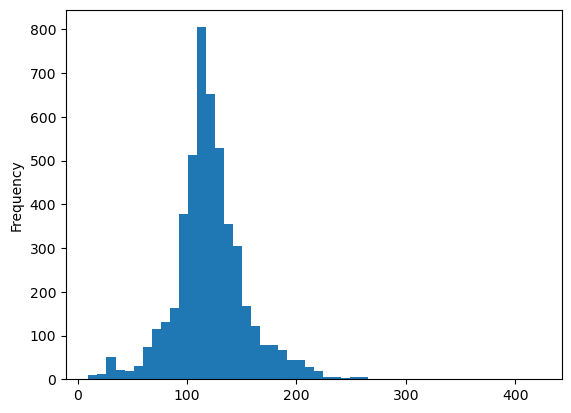

In [10]:
# Check distribution of target value
y.plot.hist(bins=50);

Nothing we can really do here, but we notice some outliers at 300+ that will require some investigation.

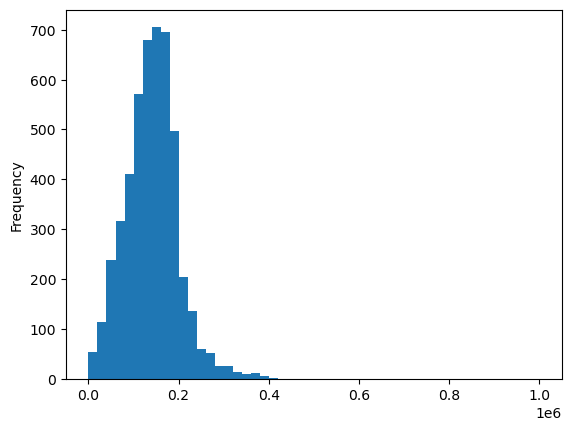

In [11]:
# Check distribution of mileage feature
df["mileage"].plot.hist(bins=50);

Same thing here, some outliers seem to exist.

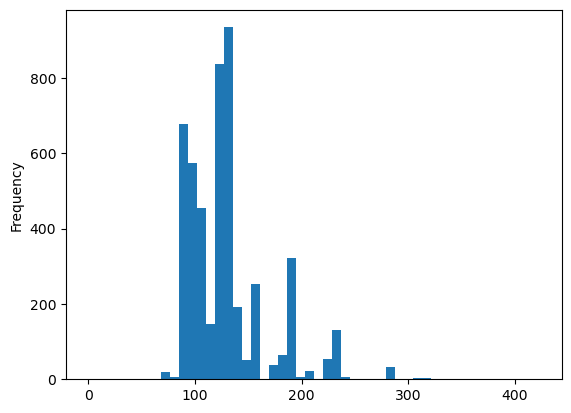

In [12]:
# Check distribution of engine_power feature
df["engine_power"].plot.hist(bins=50);

Again.

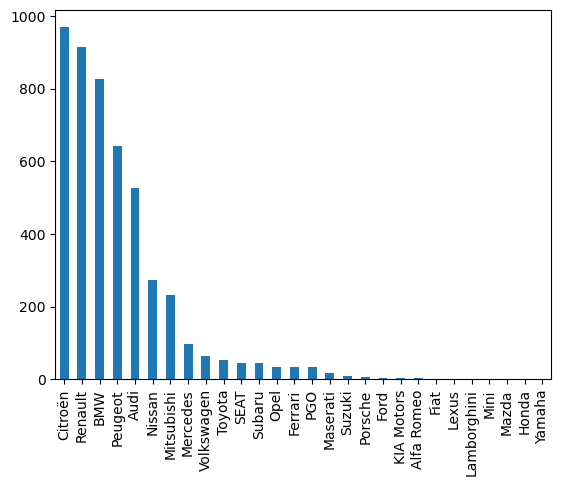

In [14]:
# Check distribution of cars models
df["model_key"].value_counts().plot.bar();

We notice that a lot of car brands are not very populated. This can lead to some overfitting, and can also widden the feature space without a lot of information.

In [17]:
# Encode categorical information into numerical variables (0 or 1)
dummied = pd.get_dummies(df)

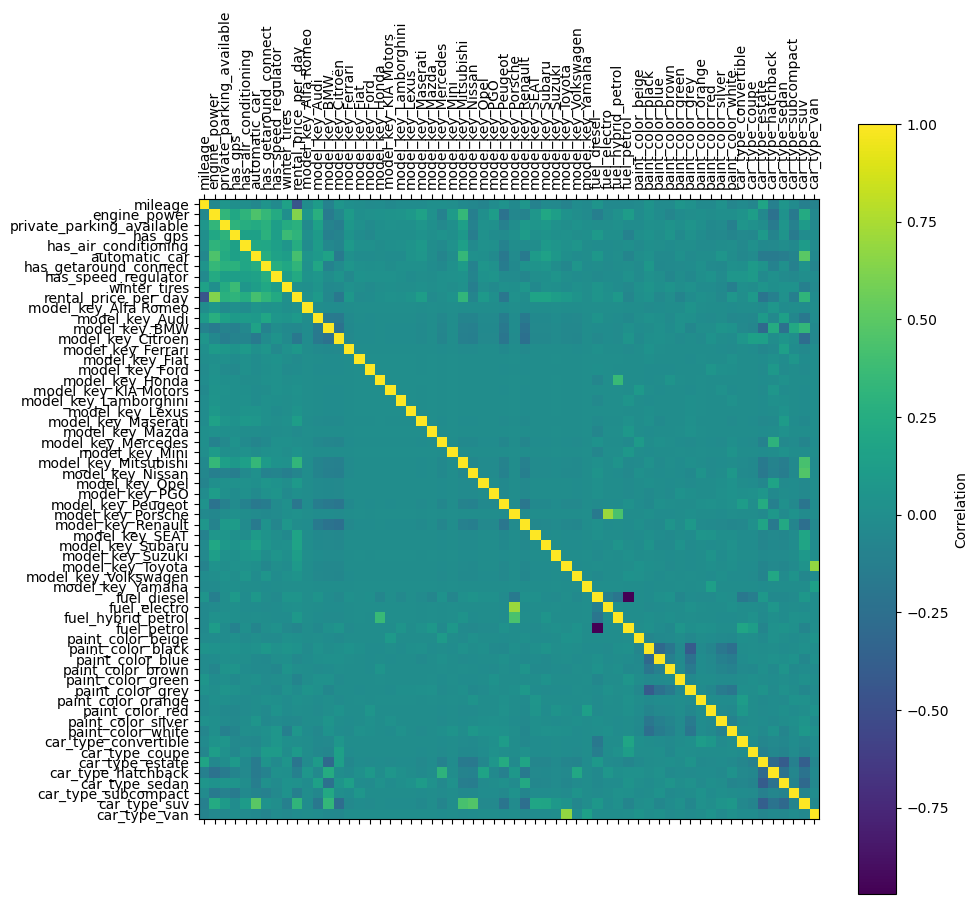

In [22]:
# Function plots a graphical correlation matrix for each pair of columns in the dataframe
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr)
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(im, label='Correlation')
    plt.show();

plot_corr(dummied)

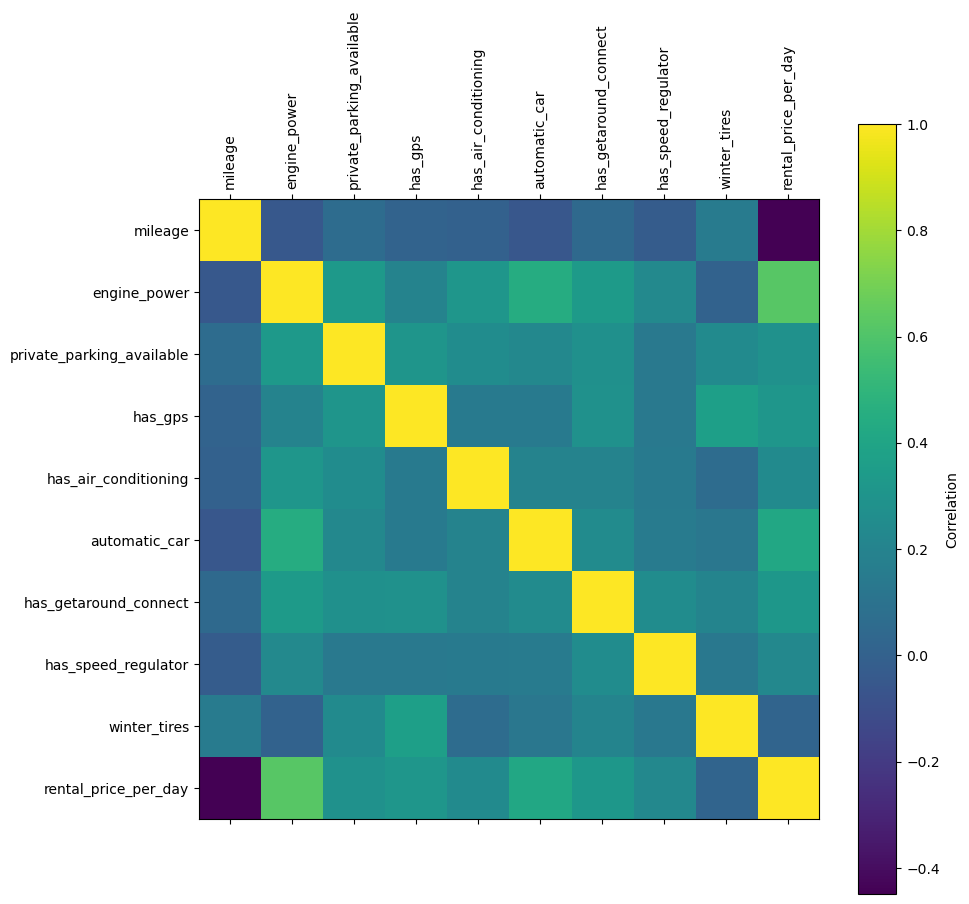

In [23]:
plot_corr(df);

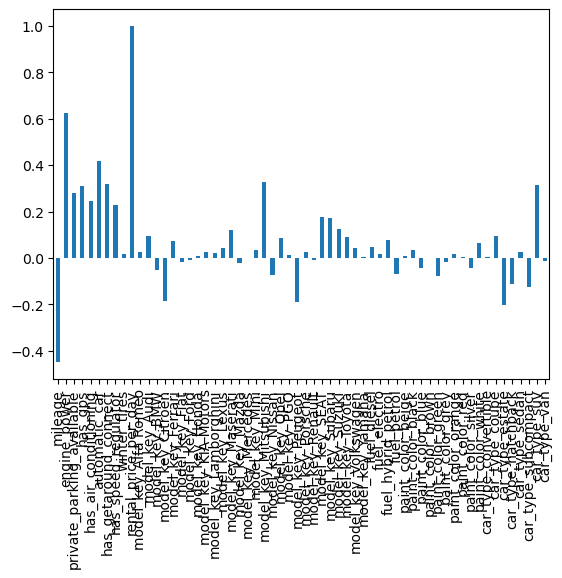

In [30]:
# Check correlation of categorical information with target value
dummied.corrwith(y).plot.bar();

As suspected while seeing the different brands frequency, there is not a lot of correlation between the different categories and the target column. We will therefore try to use a model with categorical data support.

In [ ]:
!pip install --no-use-pep517 outliertree

In [67]:
from outliertree import OutlierTree

# Explainable outlier/anomaly detection based on smart decision tree grouping
outliers_model = OutlierTree(max_depth=5)

outliers_df = outliers_model.fit(df, return_outliers=True)

Reporting top 8 outliers [out of 8 found]


row [3732] - suspicious column: [mileage] - suspicious value: [1000376.00]
	distribution: 99.979% <= 484615.00 - [mean: 140785.31] - [sd: 58921.94] - [norm. obs: 4842]



row [4753] - suspicious column: [rental_price_per_day] - suspicious value: [422.00]
	distribution: 99.973% <= 191.00 - [mean: 111.10] - [sd: 24.48] - [norm. obs: 3673]
	given:
		[engine_power] <= [137.00] (value: 135.00)


row [2350] - suspicious column: [mileage] - suspicious value: [477571.00]
	distribution: 96.000% <= 265751.00 - [mean: 148934.37] - [sd: 41433.11] - [norm. obs: 24]
	given:
		[rental_price_per_day] <= [42.00] (value: 35.00)
		[winter_tires] = [False]


row [4684] - suspicious column: [rental_price_per_day] - suspicious value: [378.00]
	distribution: 99.712% <= 225.00 - [mean: 162.55] - [sd: 29.87] - [norm. obs: 346]
	given:
		[mileage] between (69768.00, 125864.00] (value: 103222.00)
		[engine_power] > [137.00] (value: 140.00)


row [771] - suspicious colu

Here we use an outlier detection tree to find out if some data points are out of distribution. We can identify and investigate a few, and this leads us to investigate the extreme cases below.

In [54]:
# Check if suspicious rentals prices
df[df["rental_price_per_day"] > 260]

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
90,Renault,12402,170,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,309
2938,Renault,-64,230,diesel,black,sedan,True,True,False,True,False,False,True,274
3320,Maserati,25858,235,diesel,black,sedan,True,True,False,True,False,False,True,261
3345,Maserati,25571,235,diesel,black,sedan,True,True,False,True,False,False,True,261
3595,Maserati,34624,235,diesel,grey,sedan,True,True,True,True,False,True,True,262
4146,Suzuki,2970,423,petrol,red,suv,True,True,True,False,False,False,True,287
4684,SEAT,103222,140,diesel,grey,suv,True,True,False,False,True,False,True,378
4731,Toyota,4530,230,diesel,silver,suv,True,True,False,True,False,False,False,270
4753,BMW,72515,135,diesel,blue,suv,False,False,True,False,False,False,False,422


In [55]:
# Check if suspicious mileage
df[df["mileage"]<0]

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
2938,Renault,-64,230,diesel,black,sedan,True,True,False,True,False,False,True,274


In [65]:
# Check if suspicious engine power
df.query("engine_power > 300 or engine_power < 70")

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
67,Peugeot,29925,309,petrol,silver,coupe,True,True,False,False,True,True,True,217
72,Citroën,69410,317,petrol,white,coupe,True,True,False,False,False,True,True,232
73,Peugeot,170550,309,petrol,grey,coupe,True,True,False,False,True,False,True,167
93,Peugeot,99283,309,petrol,silver,coupe,False,False,False,False,True,False,True,169
139,Peugeot,169970,309,petrol,grey,coupe,True,True,False,False,True,False,True,189
1796,Porsche,152328,25,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,142
1925,Porsche,152470,25,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,124
2390,Peugeot,170529,66,diesel,silver,hatchback,False,False,True,False,False,False,False,32
2771,Renault,146951,66,petrol,white,sedan,False,False,False,False,False,False,False,36


We can identify some points that are plain wrong, or maybe a different kind of vehicle. There are also some that are too different from the rest. It might not be completely wrong. A collection car for example could have 'bad' characteristics, but still be rented for a high price. But we do not have access to those informations, it is therefore better to remove those rows as to not confuse the model and have it be as general as possible.

In [34]:
ids_to_remove = [1, 1796, 1925, 2390, 2771, 2938, 3765, 3732, 4753, 4684]

no_outliers = df.drop(index=ids_to_remove)
print("The new dataset is made of", no_outliers.shape[0], "observations and", no_outliers.shape[1], "features")

The new dataset is made of 4833 observations and 14 features


In [75]:
no_outliers.to_csv("../data/no_outliers.csv", index=False)

We create a new dataset with the removed rows, and will use it for the training.